### Potatoa GDDClass

In [1]:
import pandas as pd

# Assuming this function needs to be defined:
def fahrenheit_to_celsius(temp_f):
    return (temp_f - 32) * 5/9

class PotatoGDD:
    def __init__(self, daily_temp_df, time_column, min_temp_column, max_temp_column, celsius=True):
        self.daily_temp_df = daily_temp_df
        self.time_column = time_column
        self.min_temp_column = min_temp_column
        self.max_temp_column = max_temp_column
        self.celsius = celsius

        # Ensure the time column is of datetime type
        self.daily_temp_df[self.time_column] = pd.to_datetime(self.daily_temp_df[self.time_column])

        # Convert the temperature to Celsius if required
        if not self.celsius:
            self.daily_temp_df[self.min_temp_column] = self.daily_temp_df[self.min_temp_column].apply(fahrenheit_to_celsius)
            self.daily_temp_df[self.max_temp_column] = self.daily_temp_df[self.max_temp_column].apply(fahrenheit_to_celsius)
    
    def potato_gdd(self, start_date, end_date):
        start_date = pd.Timestamp(start_date)
        end_date = pd.Timestamp(end_date)

        date_mask = (self.daily_temp_df[self.time_column] >= start_date) & (self.daily_temp_df[self.time_column] <= end_date)
        masked_data = self.daily_temp_df.loc[date_mask].copy()

        gdd_values = []
        cumulative_gdd = 0

        for index, row in masked_data.iterrows():
            min_temp = max(row[self.min_temp_column], 7 if self.celsius else 44.6)
            max_temp = min(row[self.max_temp_column], 30 if self.celsius else 86)

            mean_temp = (min_temp + max_temp) / 2
            base_temp = 7 if self.celsius else 44.6
            gdd = max(mean_temp - base_temp, 0)

            gdd_values.append(gdd)
            cumulative_gdd += gdd

        masked_data['GDD'] = gdd_values
        masked_data['Cumulative_GDD'] = masked_data['GDD'].cumsum()

        return masked_data


### all NOAA county data file

In [2]:
import pandas as pd

Wadena = pd.read_csv("Wadena_County_NOAA_nClimGrid.csv")
Cass = pd.read_csv("Cass_County_NOAA_nClimGrid.csv")
Crow_Wing = pd.read_csv("Crow_Wing_County_NOAA_nClimGrid.csv")
Todd = pd.read_csv("Todd_County_NOAA_nClimGrid.csv")
Morrison = pd.read_csv("Morrison_County_NOAA_nClimGrid.csv")
Douglas = pd.read_csv("Douglas_County_NOAA_nClimGrid.csv")
Otter_Tail = pd.read_csv("Otter_Tail_County_NOAA_nClimGrid.csv")
Pope = pd.read_csv("Pope_County_NOAA_nClimGrid.csv")
Stearns = pd.read_csv("Stearns_County_NOAA_nClimGrid.csv")
Sherburne = pd.read_csv("Sherburne_County_NOAA_nClimGrid.csv")
Benton = pd.read_csv("Benton_County_NOAA_nClimGrid.csv")
Becker = pd.read_csv("Becker_County_NOAA_nClimGrid.csv")
Hubbard= pd.read_csv("Hubbard_County_NOAA_nClimGrid.csv")
Kandiyohi= pd.read_csv("Kandiyohi_County_NOAA_nClimGrid.csv")



### Caclculate GDD for all county

In [3]:
import pandas as pd

# Celsius to Fahrenheit converter
def c_to_f(temp_c):
    return (temp_c * 9/5) + 32

# Assume these DataFrames (Wadena, Cass, etc.) are already loaded
county_dfs = {
    "Wadena": Wadena,
    "Cass": Cass,
    "Crow_Wing": Crow_Wing,
    "Todd": Todd,
    "Morrison": Morrison,
    "Douglas": Douglas,
    "Otter_Tail": Otter_Tail,
    "Pope": Pope,
    "Stearns": Stearns,
    "Sherburne": Sherburne,
    "Benton": Benton,
    "Becker": Becker,
    "Hubbard": Hubbard,
    "Kandiyohi": Kandiyohi
}

# Process each county
for county_name, df in county_dfs.items():
    df['time'] = pd.to_datetime(df['time'])
    all_years = []

    for year in range(1951, 2025):
        potato = PotatoGDD(df, 'time', 'tmin', 'tmax', celsius=True)
        start = pd.to_datetime(f"{year}-01-01").date()
        end = pd.to_datetime(f"{year}-12-31").date()

        gdd_df = potato.potato_gdd(start, end)
        gdd_df['Year'] = year

        # Convert GDD to Fahrenheit-equivalent if needed
        gdd_df['GDD'] = gdd_df['GDD'].apply(c_to_f)
        gdd_df['Cumulative_GDD'] = gdd_df['Cumulative_GDD'].apply(c_to_f)

        all_years.append(gdd_df)

    historical_df = pd.concat(all_years, ignore_index=True)
    historical_df.to_csv(f"{county_name}_Potato_GDD_1951_2024.csv", index=False)
    print(f"Saved: {county_name}_Potato_GDD_1951_2024.csv")


Saved: Wadena_Potato_GDD_1951_2024.csv
Saved: Cass_Potato_GDD_1951_2024.csv
Saved: Crow_Wing_Potato_GDD_1951_2024.csv
Saved: Todd_Potato_GDD_1951_2024.csv
Saved: Morrison_Potato_GDD_1951_2024.csv
Saved: Douglas_Potato_GDD_1951_2024.csv
Saved: Otter_Tail_Potato_GDD_1951_2024.csv
Saved: Pope_Potato_GDD_1951_2024.csv
Saved: Stearns_Potato_GDD_1951_2024.csv
Saved: Sherburne_Potato_GDD_1951_2024.csv
Saved: Benton_Potato_GDD_1951_2024.csv
Saved: Becker_Potato_GDD_1951_2024.csv
Saved: Hubbard_Potato_GDD_1951_2024.csv
Saved: Kandiyohi_Potato_GDD_1951_2024.csv


### 2024 GDD compared to all county 2024 datasets

In [5]:
import pandas as pd

# Celsius to Fahrenheit converter
def c_to_f(temp_c):
    return (temp_c * 9/5) + 32

# Assume these DataFrames (Wadena, Cass, etc.) are already loaded
county_dfs = {
    "Wadena": Wadena,
    "Cass": Cass,
    "Crow_Wing": Crow_Wing,
    "Todd": Todd,
    "Morrison": Morrison,
    "Douglas": Douglas,
    "Otter_Tail": Otter_Tail,
    "Pope": Pope,
    "Stearns": Stearns,
    "Sherburne": Sherburne,
    "Benton": Benton,
    "Becker": Becker,
    "Hubbard": Hubbard,
    "Kandiyohi": Kandiyohi
}

# Process each county
for county_name, df in county_dfs.items():
    df['time'] = pd.to_datetime(df['time'])
    all_years = []

    for year in range(1951, 2025):
        potato = PotatoGDD(df, 'time', 'tmin', 'tmax', celsius=True)
        start = pd.to_datetime(f"{year}-04-16").date()
        end = pd.to_datetime(f"{year}-12-31").date()

        gdd_df = potato.potato_gdd(start, end)
        gdd_df['Year'] = year

        # Convert GDD to Fahrenheit-equivalent if needed
        gdd_df['GDD'] = gdd_df['GDD'].apply(c_to_f)
        gdd_df['Cumulative_GDD'] = gdd_df['Cumulative_GDD'].apply(c_to_f)

        all_years.append(gdd_df)

    historical_df = pd.concat(all_years, ignore_index=True)
    historical_df.to_csv(f"{county_name}_growing2024_Potato_GDD_1951_2024.csv", index=False)
    print(f"Saved: {county_name}_growing2024_Potato_GDD_1951_2024.csv")

Saved: Wadena_growing2024_Potato_GDD_1951_2024.csv
Saved: Cass_growing2024_Potato_GDD_1951_2024.csv
Saved: Crow_Wing_growing2024_Potato_GDD_1951_2024.csv
Saved: Todd_growing2024_Potato_GDD_1951_2024.csv
Saved: Morrison_growing2024_Potato_GDD_1951_2024.csv
Saved: Douglas_growing2024_Potato_GDD_1951_2024.csv
Saved: Otter_Tail_growing2024_Potato_GDD_1951_2024.csv
Saved: Pope_growing2024_Potato_GDD_1951_2024.csv
Saved: Stearns_growing2024_Potato_GDD_1951_2024.csv
Saved: Sherburne_growing2024_Potato_GDD_1951_2024.csv
Saved: Benton_growing2024_Potato_GDD_1951_2024.csv
Saved: Becker_growing2024_Potato_GDD_1951_2024.csv
Saved: Hubbard_growing2024_Potato_GDD_1951_2024.csv
Saved: Kandiyohi_growing2024_Potato_GDD_1951_2024.csv


In [6]:
import pandas as pd
import os

# === Step 0: Setup ===
county_names = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
    "Becker", "Hubbard", "Kandiyohi"
]
planting_date = pd.Timestamp("2024-04-15")

# === Step 1: Load and process Becker 2024 Potato data ===
becker_2024 = pd.read_csv("Becker 2024 Potato growth stage.csv")
becker_2024.columns = becker_2024.columns.str.strip()
becker_2024["Date"] = pd.to_datetime(becker_2024["Date"] + "-2024", format="%d-%b-%Y", errors="coerce")

ordered_stages = ["I", "II", "III", "IV", "V"]

# Compute mode growth stage per date
becker_mode = becker_2024.groupby("Date")["Growth Stage"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

# Merge with AGDD and compute DAP
becker_mode_with_agdd = pd.merge(becker_mode, becker_2024, on=["Date", "Growth Stage"], how="left")
becker_mode_with_agdd["Becker DAP"] = (becker_mode_with_agdd["Date"] - planting_date).dt.days
becker_thresholds = becker_mode_with_agdd.drop_duplicates("Growth Stage")[["Growth Stage", "AGDD", "Becker DAP"]]
becker_thresholds["Growth Stage"] = pd.Categorical(becker_thresholds["Growth Stage"], categories=ordered_stages, ordered=True)
becker_thresholds = becker_thresholds.sort_values("Growth Stage").dropna()

# === Step 2: Function to extract stage timing from other counties ===
def get_stage_table_with_becker_dap(df, thresholds_df, planting_date, county, crop_name="Potato"):
    df["time"] = pd.to_datetime(df["time"])
    df = df[df["Year"] == 2024].copy()
    df["DAP"] = (df["time"] - planting_date).dt.days

    results = []
    for _, row in thresholds_df.iterrows():
        stage = row["Growth Stage"]
        threshold = row["AGDD"]
        dap_becker = int(row["Becker DAP"])
        hit = df[df["Cumulative_GDD"] >= threshold]
        if not hit.empty:
            match = hit.iloc[0]
            results.append({
                "Crop": crop_name,
                "Stage": stage,
                "AGDD Threshold(°F)": round(threshold, 2),
                "DAP Threshold": dap_becker,
                f"{county} DAP": (match["time"] - planting_date).days,
                f"{county} AGDD(°F)": round(match["Cumulative_GDD"], 1)
            })
    return pd.DataFrame(results)

# Step 3: Loop through counties and compare with Becker 
for county in county_names:
    file_name = f"{county}_Potato_GDD_1951_2024.csv"
    if os.path.isfile(file_name):
        df = pd.read_csv(file_name, parse_dates=["time"])
        final_table = get_stage_table_with_becker_dap(df, becker_thresholds, planting_date, county)

        final_table["Stage"] = pd.Categorical(final_table["Stage"], categories=ordered_stages, ordered=True)
        final_table = final_table.sort_values("Stage").reset_index(drop=True)

        print(f"\n===== {county}_2024 =====")
        print(final_table.to_string(index=False))
    else:
        print(f"File not found: {file_name}")



===== Wadena_2024 =====
  Crop Stage  AGDD Threshold(°F)  DAP Threshold  Wadena DAP  Wadena AGDD(°F)
Potato     I              463.50             39          34            466.9
Potato    II              801.00             56          56            801.8
Potato   III             1297.44             77          81           1318.3
Potato    IV             1962.54            102         106           1982.1
Potato     V             2870.01            137         147           2873.8

===== Cass_2024 =====
  Crop Stage  AGDD Threshold(°F)  DAP Threshold  Cass DAP  Cass AGDD(°F)
Potato     I              463.50             39        36          467.0
Potato    II              801.00             56        59          820.3
Potato   III             1297.44             77        83         1304.3
Potato    IV             1962.54            102       109         1988.7
Potato     V             2870.01            137       152         2894.9

===== Crow_Wing_2024 =====
  Crop Stage  AGDD Thres

### Results for 2024 datasets

In [9]:
import pandas as pd
import os

#  Setup 
county_names = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
    "Becker", "Hubbard", "Kandiyohi"
]
planting_date = pd.Timestamp("2024-04-15")

# Output folder
output_folder = "Potato_2024_Growth_Stages_Diff"
os.makedirs(output_folder, exist_ok=True)

# === Step 1: Load and process Becker 2024 Potato growth stages ===
becker_2024 = pd.read_csv("Becker 2024 Potato growth stage.csv")
becker_2024.columns = becker_2024.columns.str.strip()
becker_2024["Date"] = pd.to_datetime(becker_2024["Date"] + "-2024", format="%d-%b-%Y", errors="coerce")

ordered_stages = ["I", "II", "III", "IV", "V"]

# Mode-based thresholds
becker_mode = becker_2024.groupby("Date")["Growth Stage"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

becker_mode_with_agdd = pd.merge(becker_mode, becker_2024, on=["Date", "Growth Stage"], how="left")
becker_mode_with_agdd["Becker DAP"] = (becker_mode_with_agdd["Date"] - planting_date).dt.days
becker_thresholds = becker_mode_with_agdd.drop_duplicates("Growth Stage")[["Growth Stage", "AGDD", "Becker DAP"]]
becker_thresholds["Growth Stage"] = pd.Categorical(becker_thresholds["Growth Stage"], categories=ordered_stages, ordered=True)
becker_thresholds = becker_thresholds.sort_values("Growth Stage").dropna()

# === Step 2: Function to calculate stage difference table ===
def get_stage_table_with_becker_dap(df, thresholds_df, planting_date, county, crop_name="Potato"):
    df["time"] = pd.to_datetime(df["time"])
    df = df[df["Year"] == 2024].copy()
    df["DAP"] = (df["time"] - planting_date).dt.days

    results = []
    for _, row in thresholds_df.iterrows():
        stage = row["Growth Stage"]
        threshold = row["AGDD"]
        dap_becker = int(row["Becker DAP"])
        hit = df[df["Cumulative_GDD"] >= threshold]
        if not hit.empty:
            match = hit.iloc[0]
            county_dap = (match["time"] - planting_date).days
            county_agdd = round(match["Cumulative_GDD"], 1)
            results.append({
                "Crop": crop_name,
                "Stage": stage,
                "Becker DAP": dap_becker,
                f"{county} DAP": county_dap,
                "DAP Difference": county_dap - dap_becker,
                "Becker AGDD (°F)": round(threshold, 2),
                f"{county} AGDD (°F)": county_agdd,
                "AGDD Difference": county_agdd - round(threshold, 2)
            })
    return pd.DataFrame(results)

# === Step 3: Loop through counties and save tables ===
for county in county_names:
    file_name = f"{county}_Potato_GDD_1951_2024.csv"
    if os.path.isfile(file_name):
        df = pd.read_csv(file_name, parse_dates=["time"])
        final_table = get_stage_table_with_becker_dap(df, becker_thresholds, planting_date, county)

        final_table["Stage"] = pd.Categorical(final_table["Stage"], categories=ordered_stages, ordered=True)
        final_table = final_table.sort_values("Stage").reset_index(drop=True)

        output_path = os.path.join(output_folder, f"{county}_2024_growth_stage_diff.csv")
        final_table.to_csv(output_path, index=False)
        print(f"✅ Saved: {output_path}")
    else:
        print(f" File not found: {file_name}")


✅ Saved: Potato_2024_Growth_Stages_Diff/Wadena_2024_growth_stage_diff.csv
✅ Saved: Potato_2024_Growth_Stages_Diff/Cass_2024_growth_stage_diff.csv
✅ Saved: Potato_2024_Growth_Stages_Diff/Crow_Wing_2024_growth_stage_diff.csv
✅ Saved: Potato_2024_Growth_Stages_Diff/Todd_2024_growth_stage_diff.csv
✅ Saved: Potato_2024_Growth_Stages_Diff/Morrison_2024_growth_stage_diff.csv
✅ Saved: Potato_2024_Growth_Stages_Diff/Douglas_2024_growth_stage_diff.csv
✅ Saved: Potato_2024_Growth_Stages_Diff/Otter_Tail_2024_growth_stage_diff.csv
✅ Saved: Potato_2024_Growth_Stages_Diff/Pope_2024_growth_stage_diff.csv
✅ Saved: Potato_2024_Growth_Stages_Diff/Stearns_2024_growth_stage_diff.csv
✅ Saved: Potato_2024_Growth_Stages_Diff/Sherburne_2024_growth_stage_diff.csv
✅ Saved: Potato_2024_Growth_Stages_Diff/Benton_2024_growth_stage_diff.csv
✅ Saved: Potato_2024_Growth_Stages_Diff/Becker_2024_growth_stage_diff.csv
✅ Saved: Potato_2024_Growth_Stages_Diff/Hubbard_2024_growth_stage_diff.csv
✅ Saved: Potato_2024_Growth_S

### Working on simulating each day april 15 to june 15 as planting days

In [4]:
import pandas as pd
from datetime import datetime, timedelta

# Function to convert Celsius GDD to Fahrenheit GDD
def celsius_to_fahrenheit(c):
    return c * 9 / 5

# Function to get list of planting dates
def generate_planting_dates(start_date, end_date):
    return [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Dictionary of your county dataframes (make sure they are defined properly)
county_dfs = {
    "Wadena": Wadena,
    "Cass": Cass,
    "Crow_Wing": Crow_Wing,
    "Todd": Todd,
    "Morrison": Morrison,
    "Douglas": Douglas,
    "Otter_Tail": Otter_Tail,
    "Pope": Pope,
    "Stearns": Stearns,
    "Sherburne": Sherburne,
    "Benton": Benton,
    "Becker": Becker,
    "Hubbard": Hubbard,
    "Kandiyohi": Kandiyohi
}

# Loop through each county and year
for county_name, df in county_dfs.items():
    df['time'] = pd.to_datetime(df['time'])

    all_planting_results = []
    for year in range(1951, 2025):
        potato = PotatoGDD(df, 'time', 'tmin', 'tmax')  # Your existing GDD class
        start_year = pd.to_datetime(f"{year}-04-15")
        end_year = pd.to_datetime(f"{year}-12-31")
        full_gdd_df = potato.potato_gdd(start_year.date(), end_year.date())
        full_gdd_df['time'] = pd.to_datetime(full_gdd_df['time'])
        full_gdd_df['GDD'] = celsius_to_fahrenheit(full_gdd_df['GDD'])

        planting_dates = generate_planting_dates(pd.to_datetime(f"{year}-04-15"), pd.to_datetime(f"{year}-06-15"))

        for planting_date in planting_dates:
            sub_df = full_gdd_df[full_gdd_df['time'] >= planting_date].copy()
            sub_df['Year'] = year
            sub_df['Planting Date'] = planting_date.date()
            sub_df['DAP'] = (sub_df['time'] - planting_date).dt.days
            sub_df['Cumulative_GDD'] = sub_df['GDD'].cumsum()
            all_planting_results.append(sub_df)

    historical_df = pd.concat(all_planting_results, ignore_index=True)
    output_name = f"{county_name}_AllPlantingDates_Potato_GDD_1951_2024.csv"
    historical_df.to_csv(output_name, index=False)
    print(f"Saved: {output_name}")


Saved: Wadena_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Cass_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Crow_Wing_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Todd_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Morrison_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Douglas_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Otter_Tail_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Pope_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Stearns_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Sherburne_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Benton_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Becker_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Hubbard_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Kandiyohi_AllPlantingDates_Potato_GDD_1951_2024.csv


### Including Growth Stage threshold from Becker 2024 data

In [6]:
import pandas as pd
import os

# List of all counties
counties = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
     "Hubbard", "Kandiyohi"
]

# Load Becker 2024 growth stages
becker = pd.read_csv("Becker 2024 Potato growth stage.csv")
becker.columns = becker.columns.str.strip()
becker["Date"] = pd.to_datetime(becker["Date"] + "-2024", format="%d-%b-%Y", errors="coerce")

# Extract mode AGDD threshold per stage
stages = ["I", "II", "III", "IV", "V"]
thresholds = (becker
              .groupby("Growth Stage")["AGDD"]
              .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
              .dropna()
              .loc[stages]
              .reset_index())
thresholds.columns = ["Stage", "AGDD Threshold"]

# Output folder
os.makedirs("AllCounties_PotatoGrowthStages_1951_2022", exist_ok=True)

# Process each county
for county in counties:
    input_file = f"{county}_AllPlantingDates_Potato_GDD_1951_2024.csv"
    if not os.path.exists(input_file):
        print(f"File not found: {input_file}")
        continue

    df = pd.read_csv(input_file)
    df["time"] = pd.to_datetime(df["time"])
    df["Planting Date"] = pd.to_datetime(df["Planting Date"])

    results = []
    for (year, planting), group in df.groupby(["Year", "Planting Date"]):
        group = group[group["time"] >= planting].copy()
        group = group.sort_values("time")
        group["Cumulative_GDD"] = group["GDD"].cumsum()

        for _, row in thresholds.iterrows():
            stage = row["Stage"]
            agdd_thresh = row["AGDD Threshold"]
            met = group[group["Cumulative_GDD"] >= agdd_thresh]

            if not met.empty:
                first_hit = met.iloc[0]
                dap = (first_hit["time"] - planting).days
                results.append({
                    "Crop": "Potato",
                    "County": county,
                    "Year": year,
                    "Planting Date": planting.date(),
                    "Stage": stage,
                    "AGDD Threshold (°F)": round(agdd_thresh, 2),
                    "DAP Reached": dap,
                    "AGDD Reached (°F)": round(first_hit["Cumulative_GDD"], 1)
                })
            else:
                results.append({
                    "Crop": "Potato",
                    "County": county,
                    "Year": year,
                    "Planting Date": planting.date(),
                    "Stage": stage,
                    "AGDD Threshold (°F)": round(agdd_thresh, 2),
                    "DAP Reached": "",
                    "AGDD Reached (°F)": ""
                })

    # Save per county
    out_df = pd.DataFrame(results)
    out_df.to_csv(f"AllCounties_PotatoGrowthStages_1951_2022/{county}_Potato_GrowthStages_1951_2022.csv", index=False)
    print(f"Saved: {county}_Potato_GrowthStages_1951_2022.csv")

Saved: Wadena_Potato_GrowthStages_1951_2022.csv
Saved: Cass_Potato_GrowthStages_1951_2022.csv
Saved: Crow_Wing_Potato_GrowthStages_1951_2022.csv
Saved: Todd_Potato_GrowthStages_1951_2022.csv
Saved: Morrison_Potato_GrowthStages_1951_2022.csv
Saved: Douglas_Potato_GrowthStages_1951_2022.csv
Saved: Otter_Tail_Potato_GrowthStages_1951_2022.csv
Saved: Pope_Potato_GrowthStages_1951_2022.csv
Saved: Stearns_Potato_GrowthStages_1951_2022.csv
Saved: Sherburne_Potato_GrowthStages_1951_2022.csv
Saved: Benton_Potato_GrowthStages_1951_2022.csv
Saved: Hubbard_Potato_GrowthStages_1951_2022.csv
Saved: Kandiyohi_Potato_GrowthStages_1951_2022.csv


### Final result with Delta days after planting

In [5]:
import pandas as pd
import os

#All county
counties = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
    "Hubbard", "Kandiyohi"
]
output_folder = "AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef"
os.makedirs(output_folder, exist_ok=True)

# === Step 1: Load Becker 2024 thresholds ===
becker = pd.read_csv("Becker 2024 Potato growth stage.csv")
becker.columns = becker.columns.str.strip()
becker["Date"] = pd.to_datetime(becker["Date"] + "-2024", format="%d-%b-%Y", errors="coerce")

# Set reference planting date
planting_date_2024 = pd.Timestamp("2024-04-15")

# Becker thresholds by stage
ordered_stages = ["I", "II", "III", "IV", "V"]
becker_stage_data = becker[["Growth Stage", "Date", "AGDD"]].dropna()
becker_stage_data["Becker DAP"] = (becker_stage_data["Date"] - planting_date_2024).dt.days
becker_thresholds = becker_stage_data.drop_duplicates("Growth Stage")[["Growth Stage", "AGDD", "Becker DAP"]]
becker_thresholds.columns = ["Stage", "Becker AGDD", "Becker DAP"]
becker_thresholds = becker_thresholds[becker_thresholds["Stage"].isin(ordered_stages)].reset_index(drop=True)

# === Step 2: Process Each County ===
for county in counties:
    input_file = f"{county}_AllPlantingDates_Potato_GDD_1951_2024.csv"
    if not os.path.exists(input_file):
        print(f"File not found: {input_file}")
        continue

    df = pd.read_csv(input_file)
    df["time"] = pd.to_datetime(df["time"])
    df["Planting Date"] = pd.to_datetime(df["Planting Date"])

    # Filter years
    df = df[df["Year"].between(1951, 2025)].copy()

    results = []
    for (year, planting), group in df.groupby(["Year", "Planting Date"]):
        group = group[group["time"] >= planting].copy()
        group = group.sort_values("time")
        group["Cumulative_GDD"] = group["GDD"].cumsum()

        for _, row in becker_thresholds.iterrows():
            stage = row["Stage"]
            becker_agdd = row["Becker AGDD"]
            becker_dap = row["Becker DAP"]

            met = group[group["Cumulative_GDD"] >= becker_agdd]
            if not met.empty:
                first_hit = met.iloc[0]
                dap_reached = (first_hit["time"] - planting).days
                agdd_reached = round(first_hit["Cumulative_GDD"], 1)

                results.append({
                    "Crop": "Potato",
                    "County": county,
                    "Year": year,
                    "Planting Date": planting.date(),
                    "Stage": stage,
                    "Becker DAP": becker_dap,
                    "DAP Reached": dap_reached,
                    "Δ DAP": dap_reached - becker_dap,
                    "Becker AGDD (°F)": round(becker_agdd, 2),
                    "AGDD Reached (°F)": agdd_reached,
                    "Delta AGDD (Compared to Becker)": round(agdd_reached - becker_agdd, 1)
                })
            else:
                results.append({
                    "Crop": "Potato",
                    "County": county,
                    "Year": year,
                    "Planting Date": planting.date(),
                    "Stage": stage,
                    "Becker DAP": becker_dap,
                    "DAP Reached": "",
                    "Δ DAP": "",
                    "Becker AGDD (°F)": round(becker_agdd, 2),
                    "AGDD Reached (°F)": "",
                    "Delta AGDD (Compared to Becker)": ""
                })

    # === Step 3: Save Result per County ===
    out_df = pd.DataFrame(results)
    out_path = f"{output_folder}/{county}_Potato_GrowthStages_1951_2022_with_BeckerReference.csv"
    out_df.to_csv(out_path, index=False)
    print(f"Saved: {out_path}")


Saved: AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef/Wadena_Potato_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef/Cass_Potato_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef/Crow_Wing_Potato_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef/Todd_Potato_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef/Morrison_Potato_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef/Douglas_Potato_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef/Otter_Tail_Potato_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef/Pope_Potato_GrowthStages_1951_2022_with_BeckerReference.csv
Save

In [1]:
import pandas as pd
import os

# Define folder and list of files
folder = "AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef"
all_files = [f for f in os.listdir(folder) if f.endswith(".csv")]

# Combine all county CSVs
combined_df = pd.concat([pd.read_csv(os.path.join(folder, file)) for file in all_files], ignore_index=True)

# Save to one CSV
combined_df.to_csv("AllCounties_Potato_GrowthStages_Combined.csv", index=False)
print("Combined CSV saved as: AllCounties_Potato_GrowthStages_Combined.csv")


Combined CSV saved as: AllCounties_Potato_GrowthStages_Combined.csv


### Subset of sensitive window

In [103]:
import pandas as pd
import os

counties = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
    "Hubbard", "Kandiyohi"
]
input_folder = "AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef"
output_folder = "Subset_Potato_SensitivePlantingWindow"
os.makedirs(output_folder, exist_ok=True)

# === Process Each County ===
for county in counties:
    file_path = f"{input_folder}/{county}_Potato_GrowthStages_1951_2022_with_BeckerReference.csv"
    if not os.path.exists(file_path):
        print(f"Missing: {file_path}")
        continue

    df = pd.read_csv(file_path)
    df = df[df["Stage"].isin(["I", "II", "III", "IV", "V"])]

    # Group by Year and Planting Date, and check if all 5 stages are present
    grouped = df.groupby(["Year", "Planting Date"])
    valid_windows = []
    
    for (year, planting_date), group in grouped:
        if group["Stage"].nunique() == 5 and group["DAP Reached"].notna().all():
            valid_windows.append({
                "County": county,
                "Year": year,
                "Valid Planting Date": planting_date
            })

    valid_df = pd.DataFrame(valid_windows)

    if not valid_df.empty:
        summary = valid_df.groupby("Year")["Valid Planting Date"].agg(["min", "max"]).reset_index()
        summary.columns = ["Year", "Sensitive Planting Start", "Sensitive Planting End"]
        summary.insert(0, "County", county)
        output_path = f"{output_folder}/{county}_PotatoSensitivePlantingWindow.csv"
        summary.to_csv(output_path, index=False)
        print(f"Saved: {output_path}")
    else:
        print(f"No valid windows for {county}")


Saved: Subset_Potato_SensitivePlantingWindow/Wadena_PotatoSensitivePlantingWindow.csv
Saved: Subset_Potato_SensitivePlantingWindow/Cass_PotatoSensitivePlantingWindow.csv
Saved: Subset_Potato_SensitivePlantingWindow/Crow_Wing_PotatoSensitivePlantingWindow.csv
Saved: Subset_Potato_SensitivePlantingWindow/Todd_PotatoSensitivePlantingWindow.csv
Saved: Subset_Potato_SensitivePlantingWindow/Morrison_PotatoSensitivePlantingWindow.csv
Saved: Subset_Potato_SensitivePlantingWindow/Douglas_PotatoSensitivePlantingWindow.csv
Saved: Subset_Potato_SensitivePlantingWindow/Otter_Tail_PotatoSensitivePlantingWindow.csv
Saved: Subset_Potato_SensitivePlantingWindow/Pope_PotatoSensitivePlantingWindow.csv
Saved: Subset_Potato_SensitivePlantingWindow/Stearns_PotatoSensitivePlantingWindow.csv
Saved: Subset_Potato_SensitivePlantingWindow/Sherburne_PotatoSensitivePlantingWindow.csv
Saved: Subset_Potato_SensitivePlantingWindow/Benton_PotatoSensitivePlantingWindow.csv
Saved: Subset_Potato_SensitivePlantingWindow/H

### Creating combined one file of subset

In [6]:
import pandas as pd
import os

# Setup: Define county list and folder paths ===
counties = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
    "Hubbard", "Kandiyohi"
]

# Input folder containing full growth stage outputs per county
input_folder = "AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef"

# Output folder and combined output file path
output_folder = "Subset_Potato_SensitivePlantingWindow"
output_file = os.path.join(output_folder, "AllCounties_PotatoSensitivePlantingWindow.csv")

# Create output folder if it doesn't already exist
os.makedirs(output_folder, exist_ok=True)

# List to collect summary data from all counties
all_data = []

# === Process each county individually ===
for county in counties:
    # Build the path to the input CSV file for this county
    file_path = f"{input_folder}/{county}_Potato_GrowthStages_1951_2022_with_BeckerReference.csv"
    
    # Skip if the file does not exist
    if not os.path.exists(file_path):
        print(f"Missing: {file_path}")
        continue

    # Load the CSV file
    df = pd.read_csv(file_path)

    # Keep only rows corresponding to the five growth stages: I to V
    df = df[df["Stage"].isin(["I", "II", "III", "IV", "V"])]

    # Group the data by Year and Planting Date
    grouped = df.groupby(["Year", "Planting Date"])
    
    # Store planting dates where all 5 stages were reached
    valid_windows = []

    for (year, planting_date), group in grouped:
        # Filtering logic for "sensitive" planting dates 
        # Condition 1: The planting date group must contain all 5 stages
        # Condition 2: Each stage must have a non-missing "DAP Reached" value
        if group["Stage"].nunique() == 5 and group["DAP Reached"].notna().all():
            # If both conditions are satisfied, mark this planting date as valid
            valid_windows.append({
                "County": county,
                "Year": year,
                "Valid Planting Date": planting_date
            })

    # Convert valid planting dates into a DataFrame
    valid_df = pd.DataFrame(valid_windows)

    if not valid_df.empty:
        # === Determine the sensitive window (earliest to latest valid planting dates) ===
        summary = valid_df.groupby("Year")["Valid Planting Date"].agg(["min", "max"]).reset_index()

        # Rename columns for clarity
        summary.columns = ["Year", "Sensitive Planting Start", "Sensitive Planting End"]

        # Add county name as a column
        summary.insert(0, "County", county)

        # Add this county's summary to the list
        all_data.append(summary)
    else:
        print(f"No valid windows for {county}")

# === Combine all counties into a single CSV ===
if all_data:
    # Concatenate all per-county summary tables
    combined_df = pd.concat(all_data, ignore_index=True)

    # Save as one combined CSV
    combined_df.to_csv(output_file, index=False)
    print(f"Combined file saved at: {output_file}")
else:
    print("No valid planting windows found.")


Combined file saved at: Subset_Potato_SensitivePlantingWindow/AllCounties_PotatoSensitivePlantingWindow.csv


#### Trying sensitive window plots for final output

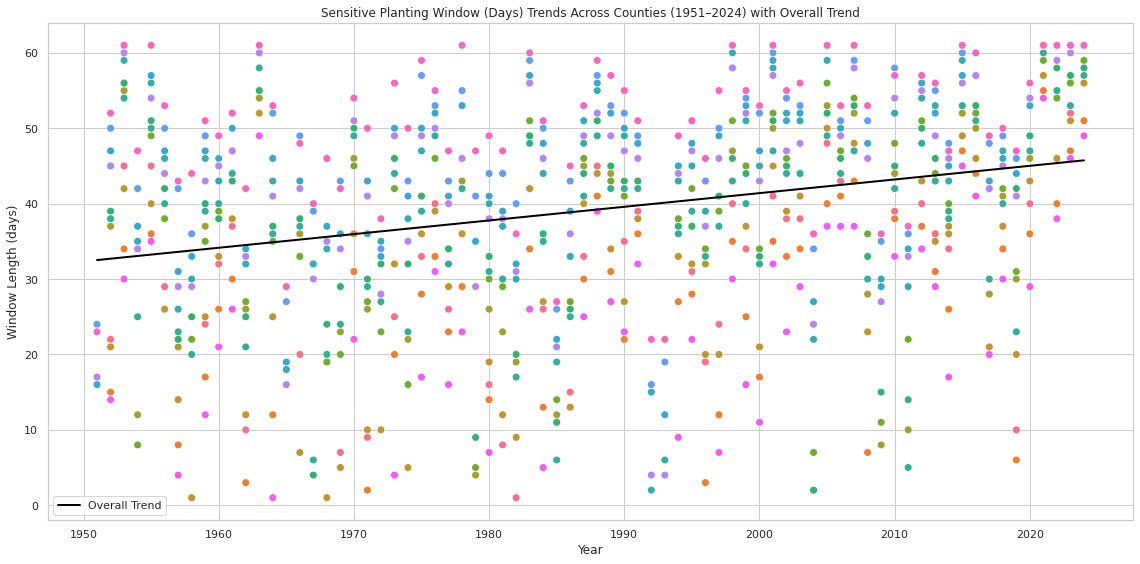

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined sensitive planting window dataset
file_path = "Subset_Potato_SensitivePlantingWindow/AllCounties_PotatoSensitivePlantingWindow.csv"
df = pd.read_csv(file_path)

# Calculate window length
df["Sensitive Planting Start"] = pd.to_datetime(df["Sensitive Planting Start"])
df["Sensitive Planting End"] = pd.to_datetime(df["Sensitive Planting End"])
df["Window Length (days)"] = (df["Sensitive Planting End"] - df["Sensitive Planting Start"]).dt.days

# Drop rows with missing or zero window length
df = df.dropna(subset=["Window Length (days)"])
df = df[df["Window Length (days)"] > 0]

# Overall linear regression
overall_fit = pd.DataFrame({
    "Year": df["Year"],
    "Window Length (days)": df["Window Length (days)"]
})
m, b = np.polyfit(overall_fit["Year"], overall_fit["Window Length (days)"], 1)

# Plot
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x="Year", y="Window Length (days)", hue="County", legend=False, s=60)

# Overall trendline
years = pd.Series(sorted(df["Year"].unique()))
plt.plot(years, m * years + b, color="black", linewidth=2, label="Overall Trend")

plt.title("Sensitive Planting Window (Days) Trends Across Counties (1951–2024) with Overall Trend")
plt.xlabel("Year")
plt.ylabel("Window Length (days)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


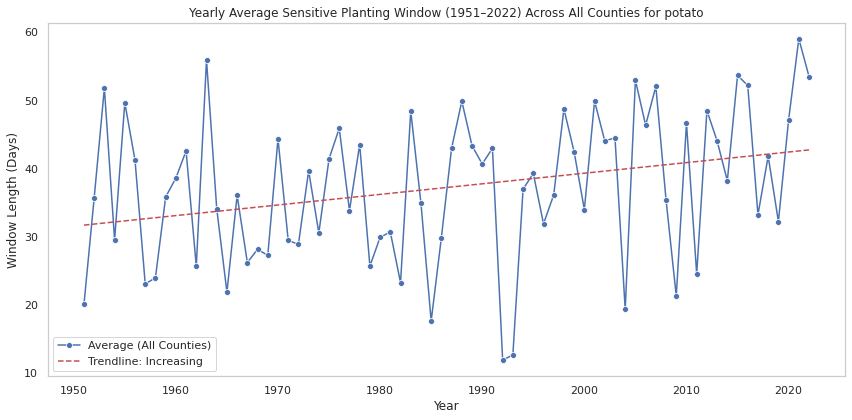

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# === Load Data ===
df = pd.read_csv("Subset_Potato_SensitivePlantingWindow/AllCounties_PotatoSensitivePlantingWindow.csv")

# === Convert to datetime ===
df["Sensitive Planting Start"] = pd.to_datetime(df["Sensitive Planting Start"])
df["Sensitive Planting End"] = pd.to_datetime(df["Sensitive Planting End"])

# === Calculate Window Length ===
df["Window Length (days)"] = (df["Sensitive Planting End"] - df["Sensitive Planting Start"]).dt.days

# === Filter for 1951–2022 ===
df = df[df["Year"].between(1951, 2022)]

# === Yearly average across counties ===
yearly_avg = df.groupby("Year")["Window Length (days)"].mean().reset_index()

# === Fit linear trendline ===
z = np.polyfit(yearly_avg["Year"], yearly_avg["Window Length (days)"], 1)
p = np.poly1d(z)

# Determine trend direction
slope = z[0]
trend_label = "Increasing" if slope > 0 else "Decreasing" if slope < 0 else "Stable"

# === Plot ===
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg, x="Year", y="Window Length (days)", marker="o", label="Average (All Counties)")
plt.plot(yearly_avg["Year"], p(yearly_avg["Year"]), "r--", label=f"Trendline: {trend_label}")

plt.title("Yearly Average Sensitive Planting Window (1951–2022) Across All Counties for potato")
plt.xlabel("Year")
plt.ylabel("Window Length (Days)")
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()


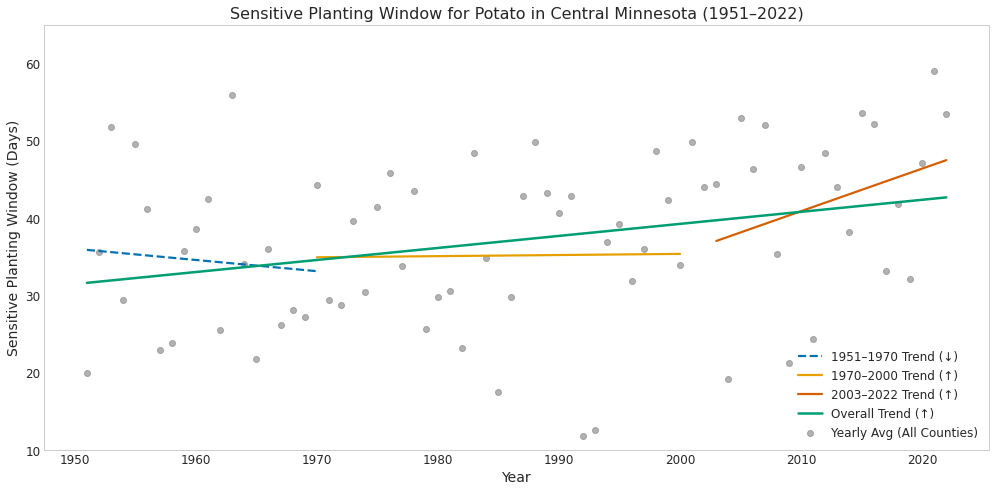

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set colorblind-friendly palette and style
sns.set_palette("colorblind")
plt.style.use("seaborn-whitegrid")

# Color map for trend periods
color_map = {
    "1951–1970": "#0072B2",  # Blue
    "1970–2000": "#E69F00",  # Orange
    "2003–2022": "#D55E00",  # Red-Orange
}

# Create the plot
plt.figure(figsize=(14, 7))

# Plot yearly average scatter and line
plt.scatter(yearly_avg["Year"], yearly_avg["WindowLength"], color='gray', label="Yearly Avg (All Counties)", alpha=0.6)


# Add segmented trend lines
for label, (start, end) in periods.items():
    if label == "1951–2022":
        continue  # Skip this for now, we add it as full increasing/decreasing trend separately
    mask = (yearly_avg["Year"] >= start) & (yearly_avg["Year"] <= end)
    x = yearly_avg.loc[mask, "Year"]
    y = yearly_avg.loc[mask, "WindowLength"]
    if len(x) > 1:
        coef = np.polyfit(x, y, 1)
        poly = np.poly1d(coef)
        slope = coef[0]
        linestyle = '-' if slope >= 0 else '--'
        plt.plot(x, poly(x), linestyle=linestyle, color=color_map[label], linewidth=2.2,
                 label=f"{label} Trend ({'↑' if slope >= 0 else '↓'})")

# Add Overall Trends 
x_full = yearly_avg["Year"]
y_full = yearly_avg["WindowLength"]

# Increasing trend (solid green)
coef_inc = np.polyfit(x_full, y_full, 1)
poly_inc = np.poly1d(coef_inc)
plt.plot(x_full, poly_inc(x_full), linestyle='-', color="#009E73", linewidth=2.5, label="Overall Trend (↑)")

# Final formatting
plt.title("Sensitive Planting Window for Potato in Central Minnesota (1951–2022)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Sensitive Planting Window (Days)", fontsize=14)
plt.ylim(10, 65)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc="best")
plt.grid(False)
plt.tight_layout()
plt.show()
